# Мазур Анастасия Вадимовна, 316 группа ВМК МГУ
## Вариант 10

**Зависимая переменная**
- Акции Лукойл
  
**Предикторы**
- Индекс S&P500
- Золото
- Нефть.Брент
- Медь
- USD / Euro
- RUB/USD
- Газ

In [ ]:
# Выключаю вывод предупреждающих сообщений warning
oldw <- getOption("warn")
options(warn = -1)

install.packages("TSA")
library("TSA")
knitr::opts_chunk$set(echo = TRUE)

_**Примечание:** синхронизацию данных по времени делала вручную в Excel._   
_Данные выгружала за 2 года с 05.02.2019 по 05.02.2021_

Рассмотрим полученную таблицу:

In [17]:
dfPath <- './'
df <- read.table(paste(dfPath, 'Stocks.csv', sep = '/'), header=TRUE,sep=',')

head(df)
tail(df)

,LKOH_date,LKOH_close,SP500_date,SP500_close,GOLD_date,GOLD_close,BRENT_date,BRENT_close,COPPER_date,COPPER_close,USD_EUR_date,USD_EUR_close,RUB_USD_date,RUB_USD_close,GAS_date,GAS_close
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,05.02.2019,5435.0,05.02.2019,2737.70,05.02.2019,1317.4,05.02.2019,62.11,05.02.2019,6214.852,05.02.2019,1.14128,05.02.2019,65.6030,05.02.2019,2.695
2,06.02.2019,5461.0,06.02.2019,2731.61,06.02.2019,1310.6,06.02.2019,62.55,06.02.2019,6228.080,06.02.2019,1.13682,06.02.2019,65.8716,06.02.2019,2.671
3,07.02.2019,5385.0,07.02.2019,2706.05,07.02.2019,1314.9,07.02.2019,61.68,07.02.2019,6238.001,07.02.2019,1.13425,07.02.2019,65.8771,07.02.2019,2.579
4,08.02.2019,5386.0,08.02.2019,2707.88,08.02.2019,1318.2,08.02.2019,61.97,08.02.2019,6202.727,08.02.2019,1.13221,08.02.2019,65.7237,08.02.2019,2.618
5,11.02.2019,5419.5,11.02.2019,2709.80,11.02.2019,1316.9,11.02.2019,61.58,11.02.2019,6148.713,11.02.2019,1.12764,11.02.2019,65.7753,11.02.2019,2.655
6,12.02.2019,5439.0,12.02.2019,2744.73,12.02.2019,1314.5,12.02.2019,62.61,12.02.2019,6117.848,12.02.2019,1.13315,12.02.2019,65.8077,12.02.2019,2.603


,LKOH_date,LKOH_close,SP500_date,SP500_close,GOLD_date,GOLD_close,BRENT_date,BRENT_close,COPPER_date,COPPER_close,USD_EUR_date,USD_EUR_close,RUB_USD_date,RUB_USD_close,GAS_date,GAS_close
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
421,29.01.2021,5377.0,29.01.2021,3714.24,29.01.2021,1849.8,29.01.2021,55.10,29.01.2021,7808.799,29.01.2021,1.21362,29.01.2021,75.8064,29.01.2021,2.557
422,01.02.2021,5406.0,01.02.2021,3773.86,01.02.2021,1856.0,01.02.2021,56.21,01.02.2021,7842.971,01.02.2021,1.20677,01.02.2021,76.0720,01.02.2021,2.847
423,02.02.2021,5516.0,02.02.2021,3826.31,02.02.2021,1841.4,02.02.2021,57.82,02.02.2021,7781.242,02.02.2021,1.20360,02.02.2021,76.2349,02.02.2021,2.825
424,03.02.2021,5555.0,03.02.2021,3830.17,03.02.2021,1822.9,03.02.2021,58.67,03.02.2021,7876.041,03.02.2021,1.20410,03.02.2021,75.9224,03.02.2021,2.766
425,04.02.2021,5699.5,04.02.2021,3871.74,04.02.2021,1795.3,04.02.2021,59.11,04.02.2021,7848.483,04.02.2021,1.19656,04.02.2021,75.5429,04.02.2021,2.969
426,05.02.2021,5715.0,05.02.2021,3886.83,05.02.2021,1815.2,05.02.2021,59.62,05.02.2021,8024.853,05.02.2021,1.20476,05.02.2021,74.5982,05.02.2021,2.882


In [19]:
n = length(df$LKOH_date)
n

[1] 426

Переходим к доходностям:

In [23]:
Y = df$LKOH_close[2:n] / df$LKOH_close[1:(n - 1)] - 1

X1 = df$SP500_close[2:n]/df$SP500_close[1:(n - 1)] - 1
X2 = df$GOLD_close[2:n]/df$GOLD_close[1:(n - 1)] - 1
X3 = df$BRENT_close[2:n]/df$BRENT_close[1:(n - 1)] - 1
X4 = df$COPPER_close[2:n]/df$COPPER_close[1:(n - 1)] - 1
X5 = df$USD_EUR_close[2:n]/df$USD_EUR_close[1:(n - 1)] - 1
X6 = df$RUB_USD_close[2:n]/df$RUB_USD_close[1:(n - 1)] - 1
X7 = df$GAS_close[2:n]/df$GAS_close[1:(n - 1)] - 1

Теперь наши данные готовы для анализа линейной регрессии.
Производим оценку модели и смотрим результаты:

In [24]:
model <- lm(Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7)
summary(model)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.120218 -0.011367 -0.000812  0.010200  0.102495 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0004088  0.0009901   0.413   0.6799    
X1           0.1041788  0.0708379   1.471   0.1421    
X2           0.1812840  0.0881811   2.056   0.0404 *  
X3           0.2129853  0.0356241   5.979 4.84e-09 ***
X4          -0.0554659  0.0873269  -0.635   0.5257    
X5          -0.7908666  0.2405410  -3.288   0.0011 ** 
X6          -0.6191265  0.1334166  -4.641 4.66e-06 ***
X7           0.0027827  0.0241318   0.115   0.9083    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02024 on 417 degrees of freedom
Multiple R-squared:  0.2893,	Adjusted R-squared:  0.2773 
F-statistic: 24.24 on 7 and 417 DF,  p-value: < 2.2e-16


Значимыми оказались BRENT, RUB_USD, USD_EUR, GOLD. Модель невырожденная.

In [34]:
model <- lm(Y ~ X2 + X3 + X5 + X6)
summary(model)


Call:
lm(formula = Y ~ X2 + X3 + X5 + X6)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.119023 -0.011182 -0.000224  0.010249  0.099707 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0004800  0.0009858   0.487 0.626574    
X2           0.1958807  0.0874534   2.240 0.025624 *  
X3           0.2228199  0.0340660   6.541 1.78e-10 ***
X5          -0.8441923  0.2314740  -3.647 0.000299 ***
X6          -0.6616508  0.1217544  -5.434 9.34e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02022 on 420 degrees of freedom
Multiple R-squared:  0.2854,	Adjusted R-squared:  0.2786 
F-statistic: 41.93 on 4 and 420 DF,  p-value: < 2.2e-16


Теперь проведём анализ остатков:

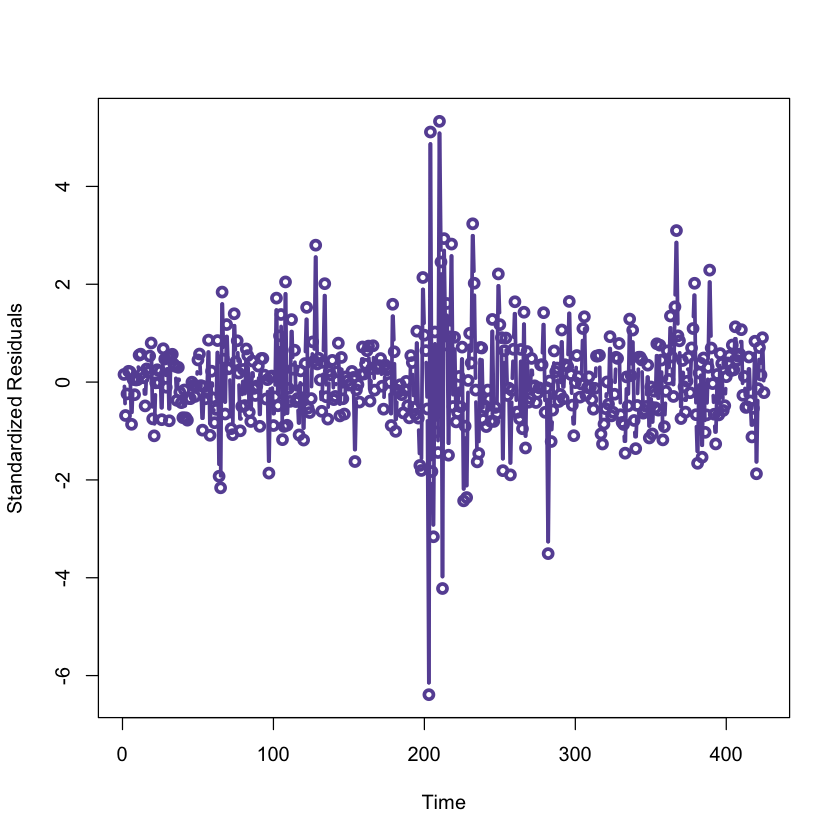

In [35]:
plot(y = rstudent(model), type = "b", x = c(1:length(rstudent(model))),xlab = "Time",ylab="Standardized Residuals", col = "#6852A3",lwd = 3)

Построим гистограмму:

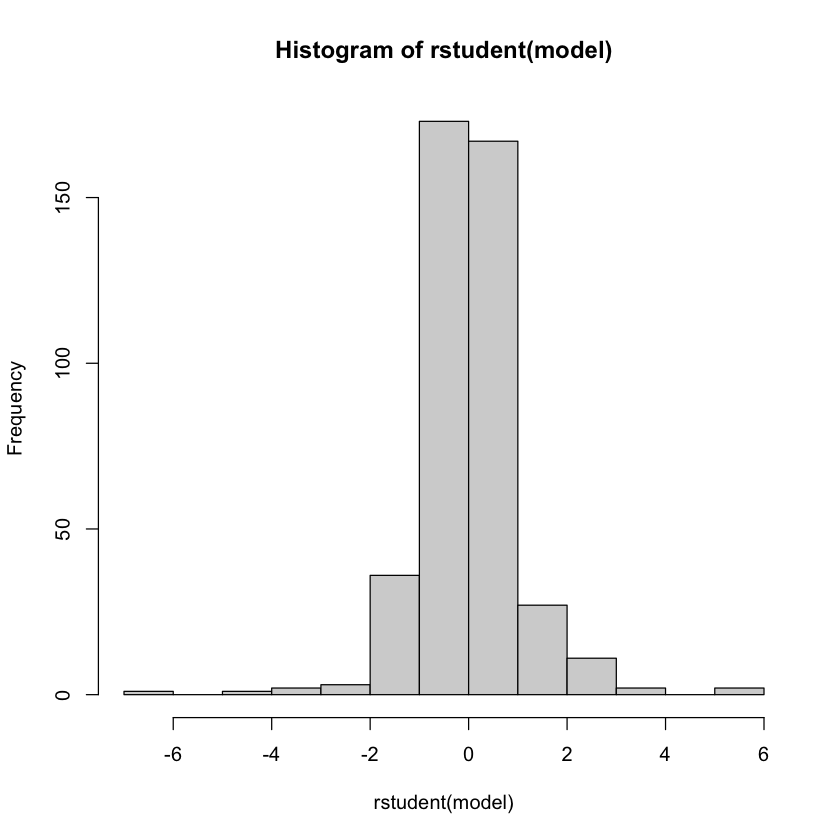

In [36]:
hist(rstudent(model))

Проверим на нормальность:

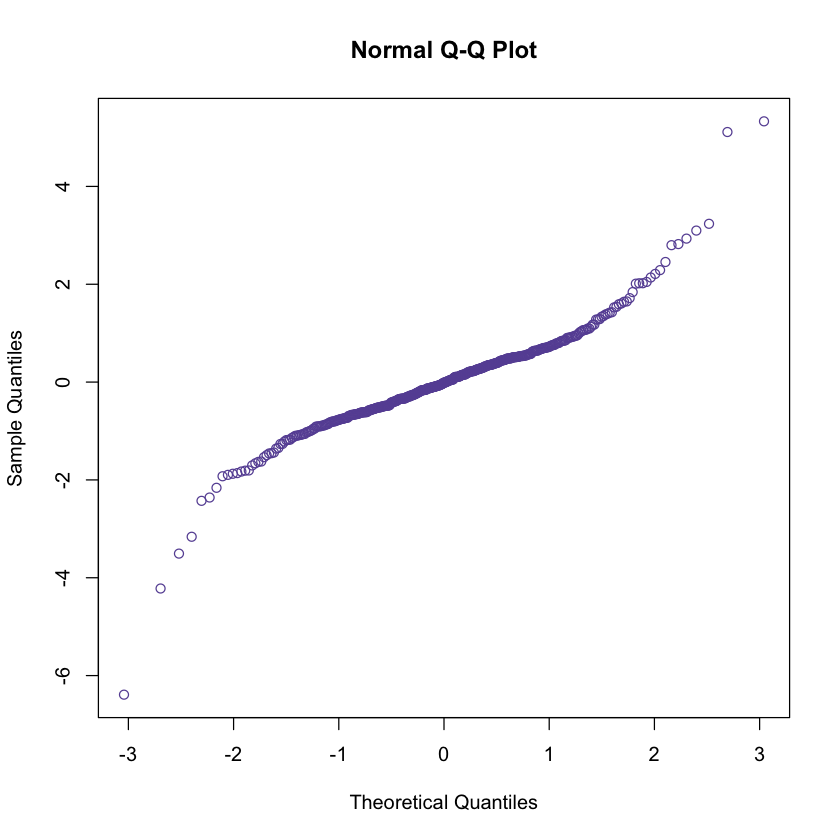

In [37]:
qqnorm(rstudent(model),col = "#6852A3")

In [38]:
shapiro.test((rstudent(model)))


	Shapiro-Wilk normality test

data:  (rstudent(model))
W = 0.91493, p-value = 9.7e-15


Данный тест показал значение $p\_value < 0.05 \Rightarrow $ гипотеза нормальности отвергается.